In [2]:
import pandas as pd
import numpy as np
import datetime
import nltk
from nltk import word_tokenize,regexp_tokenize
from nltk.util import ngrams
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from itertools import chain

In [3]:
# regexp_tokenize("aku ' . las , ' / as as", r'\w+')

In [4]:
data = pd.read_pickle('clean_data_05102018.pkl')

In [5]:
data = data.content

In [6]:
data = data.tolist()
pattern = r'\w+'

In [7]:
data = [list(map(' '.join, ngrams(regexp_tokenize(x.lower(), pattern), 2))) for x in data]

In [8]:
data = list(chain.from_iterable(data))

In [9]:
freq_uni = nltk.FreqDist(ch for ch in data)
# take 50 commons ngram 
freq_commons_uni = freq_uni.most_common(50)
tup_uni = tuple(freq_commons_uni)
dict_uni_all = dict((x, y) for x, y in tup_uni)

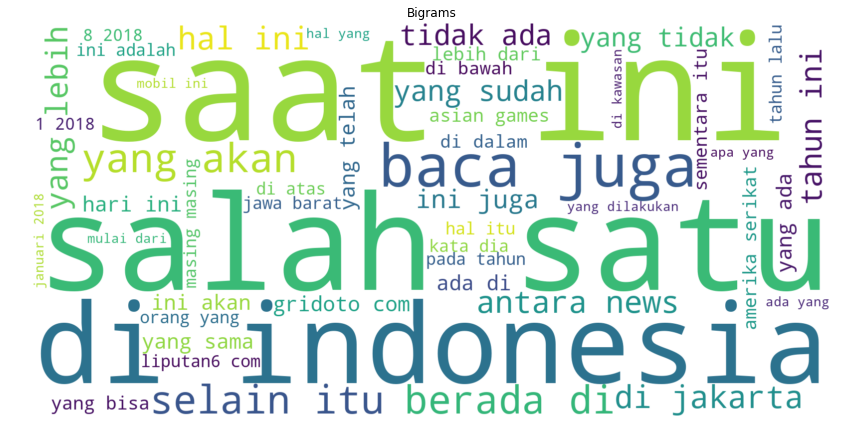

In [10]:
cloud_uni = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_uni.generate_from_frequencies(dict_uni_all)
plt.figure(figsize=(20,6))
plt.title('Bigrams')
plt.imshow(cloud_uni, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ngram = pd.read_pickle('bigrams.pkl')

In [ ]:
ngram.category.unique()

In [ ]:
ngram1 = ngram[ngram['subcategory'].notnull()]
ngram1[ngram1['subcategory'].str.contains('properti', case=False)]['category'].unique()

# Bigrams All

In [ ]:
ngram = ngram[ngram.bigrams_str.notnull()]

In [ ]:
#gabung
all_bigram = ngram.bigrams_str.str.cat(sep=', ')

In [ ]:
all_bigram_token = all_bigram.split(',')

In [ ]:
freq = nltk.FreqDist(ch for ch in all_bigram_token)

In [ ]:
# take 50 commons ngram 
freq_commons = freq.most_common(50)

In [ ]:
df_freq = pd.DataFrame(freq_commons)

In [ ]:
df_freq.columns = ['bigram','f']

In [ ]:
df_freq.head()

In [ ]:
df_freq['percent'] = (df_freq['f'] / len(all_bigram_token))

In [ ]:
cloud = wordcloud.WordCloud(background_color='white')

In [ ]:
tup = tuple(freq_commons)
dict_bi_all = dict((x, y) for x, y in tup)

In [ ]:
plt.figure(figsize=(20,6))
cloud.generate_from_frequencies(dict_bi_all)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Category Generalization

In [ ]:
def translate_category(x):
    x[0] = str(x[0])
    x[1] = str(x[1])
    x[2] = str(x[2])
    if x[0].lower() in ['dendy raditya atmosuwito', 'dharendra wardhana', 'wahyudi akmaliah', 
                         'aris santoso', "ahmad jilul qur'ani farid", 'satya adhi', 'andi achdian', 'bagus takwin', 
                         'mohamad mova alafghani', 'ahmad ilham danial', 'muhammad yuanda zara', 'sherr rinn', 'wawancara']:
        return 'opini'
    elif (x[0].lower() == 'kolom') and (x[1].lower() in ['opini', 'pendapat']):
        return 'opini'
    elif 'pendidikan' in x[0].lower():
        return 'pendidikan'
    elif x[1].lower() in ['news']:
        return 'berita'
    elif x[0].lower() in ["nasional", "publik", "metro", "news", "haji", 
                           "fokus", "dunia", "hukum", "pilkada", "regional", 
                           "internasional", "daerah", "dunia", "hard news", 
                           "international", "berita", "humaniora", 
                           "indepth", "fokus", "politik", "sosial budaya", "metropolitan"]:
        return 'berita'
    elif (x[0].lower() == 'kolom') and (x[1].lower() in ['tajuk']):
        return 'berita'
    elif 'properti' in x[1].lower():
        return 'properti'
    elif 'properti' in x[0].lower():
        return 'properti'
    elif 'kuliner' in x[1].lower():
        return 'makanan'
    elif 'food' in x[0].lower():
        return 'makanan'
    elif ('health' in x[0].lower()) or ('kesehatan' in x[0].lower()):
        return 'makanan'
    elif ('health' in x[1].lower()) or ('kesehatan' in x[1].lower()):
        return 'makanan'
    elif 'film' in x[1].lower():
        return 'hiburan'
    elif x[1].lower() in ["hot", "travel", "celebrity", "seleb", "showbiz", "entertainment", 
                                   "film", "hobi", "musik", "hiburan"]:
        return 'hiburan'
    elif x[0].lower() in ["hot", "travel", "celebrity", "seleb", "showbiz", "entertainment", 
                                   "film", "hobi", "musik", "hiburan"]:
        return 'hiburan'
    elif x[1].lower() in ["inet", "techno", "teknologi", "digital", "autotekno", "inet", "tekno"]:
        return 'teknologi'
    elif x[0].lower() in ["inet", "techno", "teknologi", "digital", "autotekno", "inet", "tekno"]:
        return 'teknologi'
    elif x[1].lower() in ["keuangan", "finance", "economy", "bisnis", "ekbis", "marketing", "ekonomi"]:
        return 'ekonomi'
    elif x[0].lower() in ["keuangan", "finance", "economy", "bisnis", "ekbis", "marketing", "ekonomi"]:
        return 'ekonomi'
    elif x[1].lower() in ["sport", "bola", "asiangames", "pialadunia", "superskors", 
                                   "pialadunia", "soccer", "sports", "superskor", "olahraga"]:
        return 'olahraga'
    elif x[0].lower() in ["sport", "bola", "asiangames", "pialadunia", "superskors", 
                                   "pialadunia", "soccer", "sports", "superskor", "olahraga"]:
        return 'olahraga'
    elif x[2].lower() == 'seva':
        return 'otomotif'
    elif x[1].lower() in ["oto", "otomotif", "mobil", "sumber informasi", "modifikasi", "produk"]:
        return 'otomotif'
    elif x[0].lower() in ["oto", "otomotif", "mobil", "sumber informasi", "modifikasi", "produk"]:
        return 'otomotif'
    elif x[1].lower() in ["lifestyle", "cantik", "gaya hidup", "gaya", "travel", "fashion & beauty"]:
        return 'gaya hidup'
    elif x[0].lower() in ["lifestyle", "cantik", "gaya hidup", "gaya", "travel", "fashion & beauty"]:
        return 'gaya hidup'
    elif x[1].lower() == 'keluarga':
        return 'gaya hidup'
    elif (x[0].lower() == 'tribunners') and (x[1].lower() in ['umum', 'catatan pinggiran']):
        return 'lain-lain'
    elif x[0].lower() in ['mild report', 'australia-plus', ' ', '', 'nan', 'none']:
        return 'lain-lain'
    elif x[0].lower() in ['event', 'current issue']:
        return 'event'
    elif x[1].lower() in ['catatan pinggir', 'cari angin', 'jeda', ]:
        return 'lain-lain'

In [ ]:
def translate_category2(x):
    x[0] = str(x[0])
    x[1] = str(x[1])
    x[2] = str(x[2])
    
    if ('seva' in x[2].lower()) and ('properti' not in x[0].lower()):
        return 'otomotif'
    elif x[0].lower() in ["oto", "otomotif"]:
        return 'otomotif'
    elif (x[0].lower() in ["autotekno"]) and (x[1].lower() in ['mobil', 'motor']):
        return 'otomotif'
    elif (x[0].lower() in ['bisnis', 'properti', 'finance', 'ekbis', 'home']) and ('properti' in x[1].lower()):
        return 'properti'
    else:
        return x[0].lower()

In [ ]:
ngram['clean_category'] = ngram[['category', 'subcategory', 'source']].apply(translate_category2, axis=1)

In [ ]:
ngram['clean_category'].unique()

In [ ]:
ngram[ngram['clean_category'] == 'nan']

In [ ]:
ngram[ngram['clean_category'].isnull()]['category'].unique()

In [ ]:
ngram[ngram['clean_category'].isnull()]['subcategory'].unique()

In [ ]:
ngram['clean_category'].unique()

# Per Hour

### Labeling Jam

In [ ]:
ngram.loc[ngram.pubdate == '0001-02-16 00:00:00', ['pubdate']] = '2018-02-16 00:00:00'

In [ ]:
ngram.loc[ngram.pubdate == '0001-01-06 00:00:00', ['pubdate']] = '2018-01-16 00:00:00'

In [ ]:
ngram['pubdate'] = pd.to_datetime(ngram['pubdate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
ngram['time'] = ngram['pubdate'].dt.time

In [ ]:
ngram = ngram[ngram['time'] == datetime.time(hour=0)]

In [ ]:
ngram2.shape

In [ ]:
ngram[ngram.post_id == 974]

In [ ]:
ngram.dtypes

In [ ]:
def class_time(time):
    if (time >= datetime.time(hour=0)) and (time <= datetime.time(hour=5)):
        return 'dini hari'
    elif (time > datetime.time(hour=5)) and (time <= datetime.time(hour=12)):
        return 'pagi hari'
    elif (time > datetime.time(hour=12)) and (time <= datetime.time(hour=18)):
        return 'sore hari'
    elif (time > datetime.time(hour=18)) and (time <= datetime.time(hour=23, minute=59, second=59)):
        return 'malam hari'
    else:
        return 'undefined'

In [ ]:
ngram['class_time'] = ngram['time'].apply(lambda x : class_time(x))

## Grouping tokens per hour

In [ ]:
# ngram['tokenized_text_str'] = ngram['tokenized_text_str'].apply(lambda x: x.split(','))

In [ ]:
ngram = ngram[ngram.bigrams_str.notnull()]

In [ ]:
ngrams_df = ngram.groupby('class_time').agg({'bigrams_str': lambda x: ','.join(x)})

In [ ]:
ngrams_df['tokenized_text_str'] = ngrams_df['tokenized_text_str'].apply(lambda x: x.split(','))

In [ ]:
ngrams_df['freq'] = ngrams_df['tokenized_text_str'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [ ]:
# take 50 commons ngram 
ngrams_df['freq_commons_50'] = ngrams_df['freq'].apply(lambda x: x.most_common(50))

In [ ]:
ngrams_df.head()

## Visualisasi Word Cloud

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

In [ ]:
cloud = wordcloud.WordCloud()

In [ ]:
tup_50 = tuple(ngrams_df.loc['dini hari']['freq_commons_50'])

In [ ]:
dict_uni = dict((x, y) for x, y in tup_50)

In [ ]:
plt.figure(figsize=(20,6))
cloud.generate_from_frequencies(dict_uni)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("foo.png")
plt.show()

# Grouping per Category

In [ ]:
def create_wc(index, row):
    cloud = wordcloud.WordCloud(background_color='white',width=1600, height=800)
    tup_50 = tuple(row['freq_commons_50'])
    dict_uni = dict((x, y) for x, y in tup_50)
    cloud.generate_from_frequencies(dict_uni)
    plt.figure(figsize=(20,6))
    plt.title(index)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
ngrams_cat = ngram[ngram.clean_category.isin(['properti', 'otomotif'])].groupby(['clean_category']).agg({'bigrams_str': lambda x: ','.join(x)})

In [ ]:
ngrams_cat.head()

In [ ]:
# ngrams_cat_5 = ngrams_cat.loc[['berita', 'ekonomi','properti','otomotif', 'olahraga'], :]
ngrams_cat_5  = ngrams_cat.loc[['properti','otomotif'], :]

In [ ]:
ngrams_cat_5['bigrams_token'] = ngrams_cat_5['bigrams_str'].apply(lambda x: x.split(','))

In [ ]:
ngrams_cat_5['freq'] = ngrams_cat_5['bigrams_token'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [ ]:
ngrams_cat_5['freq_commons_50'] = ngrams_cat_5['freq'].apply(lambda x: x.most_common(50))

In [ ]:
for index, row in ngrams_cat_5.iterrows():
    create_wc(index,row)